In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [ ]:
tabular_data = pd.read_csv('/content/drive/MyDrive/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

In [ ]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
model = tf.keras.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

In [ ]:
lr=8.7e-04
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
batch_size=120
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 120,
                    epochs = 55,
                    callbacks=[callback])

Epoch 1/55
246/251 [============================>.] - ETA: 0s - loss: 0.8725 - accuracy: 0.6839
Epoch 1: saving model to best_model.h5
251/251 [==============================] - 5s 11ms/step - loss: 0.8667 - accuracy: 0.6860 - val_loss: 2.4481 - val_accuracy: 0.3225
Epoch 2/55
246/251 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.8686
Epoch 2: saving model to best_model.h5
251/251 [==============================] - 3s 10ms/step - loss: 0.3556 - accuracy: 0.8689 - val_loss: 0.4923 - val_accuracy: 0.8013
Epoch 3/55
249/251 [============================>.] - ETA: 0s - loss: 0.2388 - accuracy: 0.9111
Epoch 3: saving model to best_model.h5
251/251 [==============================] - 3s 11ms/step - loss: 0.2387 - accuracy: 0.9112 - val_loss: 0.2267 - val_accuracy: 0.9198
Epoch 4/55
250/251 [============================>.] - ETA: 0s - loss: 0.1687 - accuracy: 0.9380
Epoch 4: saving model to best_model.h5
251/251 [==============================] - 3s 10ms/step - loss: 

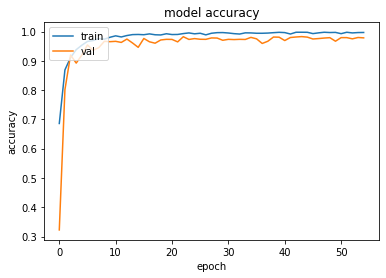

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
batch_size=120
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 120,
                    epochs = 5,
                    callbacks=[callback])

Epoch 1/5
247/251 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9949
Epoch 1: saving model to best_model.h5
251/251 [==============================] - 3s 11ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.1510 - val_accuracy: 0.9770
Epoch 2/5
248/251 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9969
Epoch 2: saving model to best_model.h5
251/251 [==============================] - 3s 12ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.1719 - val_accuracy: 0.9731
Epoch 3/5
250/251 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9980
Epoch 3: saving model to best_model.h5
251/251 [==============================] - 3s 11ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1842 - val_accuracy: 0.9735
Epoch 4/5
249/251 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9976
Epoch 4: saving model to best_model.h5
251/251 [==============================] - 3s 11ms/step - loss: 0.00

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 1s - loss: 0.1424 - accuracy: 0.9808 - 774ms/epoch - 3ms/step


In [ ]:
model.load_weights('best_model.h5')

In [ ]:
!pip install google.colab
from google.colab.patches import cv2_imshow
srcdir = '/content/drive/MyDrive/all_images'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break

Output hidden; open in https://colab.research.google.com to view.